In [1]:
%matplotlib inline
import json
import os
import sys
import matplotlib.pylab as plt
import linecache
import numpy as np
import time

# 显示top-1 failed 情况

In [2]:
with open("../data/result.json",'r') as load_f:
    results = json.load(load_f)
#     print(result)

In [3]:
def read_data_row(path, num):
    return linecache.getline(path, num)


def get_line(path, num):
    file0 = read_data_row(path, 1).strip().split(" ")
    line0 = np.array(list(map(int, file0[num].split(','))))
    return line0

*************failed********************


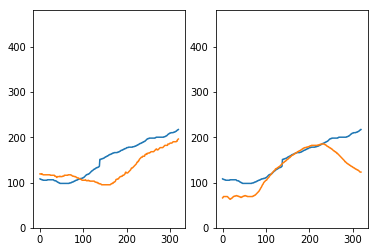

841.0.txt
['233.0.txt', '491.0.txt', '332.0.txt', '354.0.txt', '152.0.txt']
*************failed********************


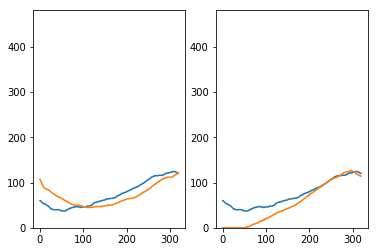

325.0.txt
['358.0.txt', '706.0.txt', '354.0.txt', '601.0.txt', '604.0.txt']
*************failed********************


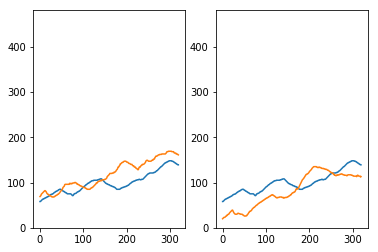

922.0.txt
['166.0.txt', '922.0.txt', '677.0.txt', '253.0.txt', '697.0.txt']
*************failed********************


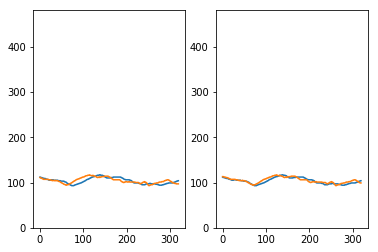

556.0.txt
['885.0.txt', '556.0.txt', '75.0.txt', '101.0.txt', '555.0.txt']
*************failed********************


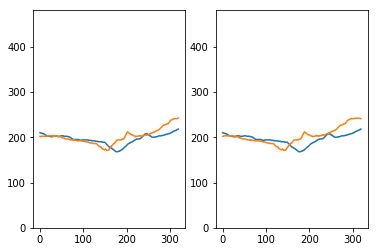

249.0.txt
['269.0.txt', '249.0.txt', '798.0.txt', '381.0.txt', '828.0.txt']
*************failed********************


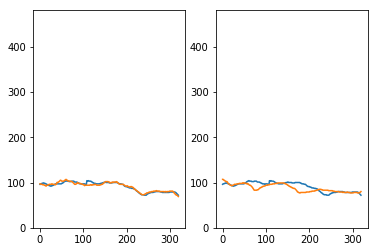

910.0.txt
['993.0.txt', '910.0.txt', '552.0.txt', '762.0.txt', '655.0.txt']
*************failed********************


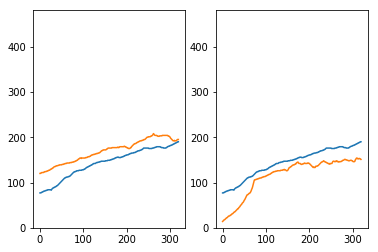

833.0.txt
['24.0.txt', '688.0.txt', '706.0.txt', '833.0.txt', '101.0.txt']
*************failed********************


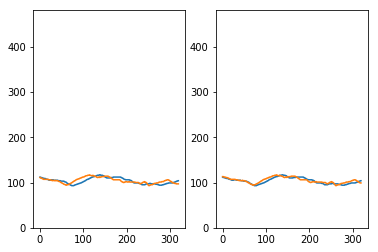

556.0.txt
['885.0.txt', '556.0.txt', '75.0.txt', '101.0.txt', '555.0.txt']
*************failed********************


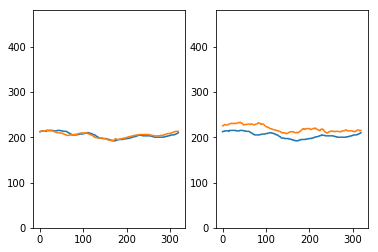

563.0.txt
['87.0.txt', '563.0.txt', '626.0.txt', '874.0.txt', '220.0.txt']
*************failed********************


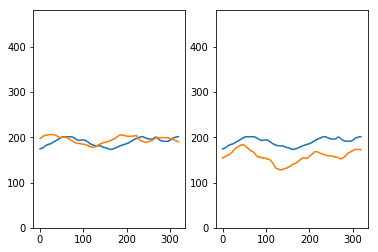

398.0.txt
['297.0.txt', '398.0.txt', '980.0.txt', '933.0.txt', '273.0.txt']
*************failed********************


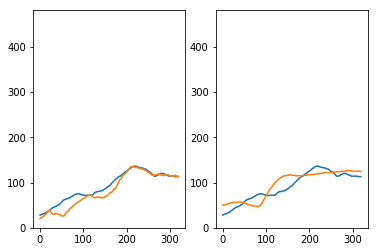

166.0.txt
['733.0.txt', '779.0.txt', '426.0.txt', '233.0.txt', '24.0.txt']
*************failed********************


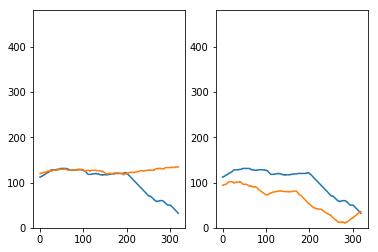

291.0.txt
['303.0.txt', '655.0.txt', '440.0.txt', '533.0.txt', '405.0.txt']
*************failed********************


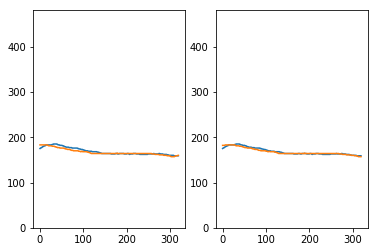

220.0.txt
['282.0.txt', '220.0.txt', '518.0.txt', '940.0.txt', '291.0.txt']
*************failed********************


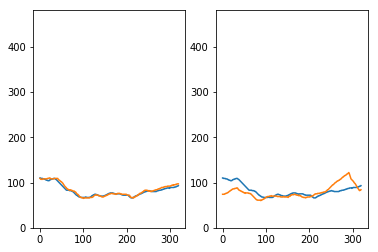

950.0.txt
['117.0.txt', '950.0.txt', '641.0.txt', '579.0.txt', '119.0.txt']
*************failed********************


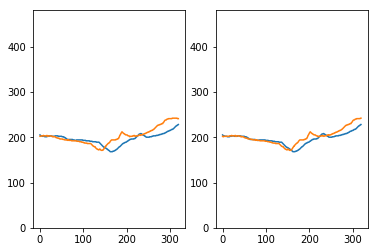

269.0.txt
['249.0.txt', '269.0.txt', '381.0.txt', '798.0.txt', '323.0.txt']
*************failed********************


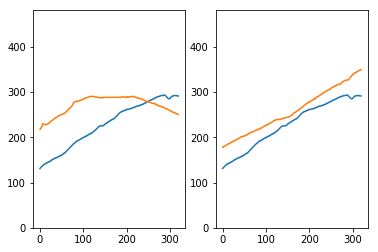

505.0.txt
['373.0.txt', '505.0.txt', '163.0.txt', '146.0.txt', '943.0.txt']
*************failed********************


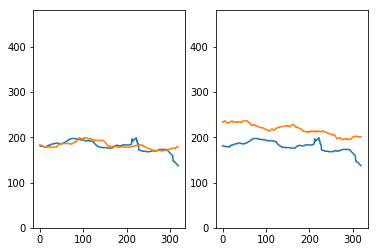

628.0.txt
['760.0.txt', '965.0.txt', '273.0.txt', '184.0.txt', '883.0.txt']
*************failed********************


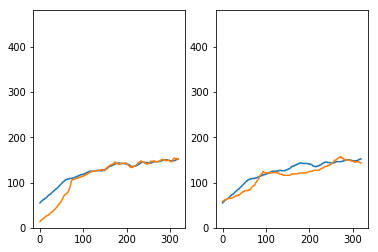

24.0.txt
['101.0.txt', '24.0.txt', '19.0.txt', '492.0.txt', '996.0.txt']
*************failed********************


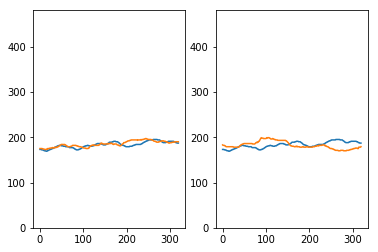

631.0.txt
['628.0.txt', '16.0.txt', '631.0.txt', '18.0.txt', '184.0.txt']
*************failed********************


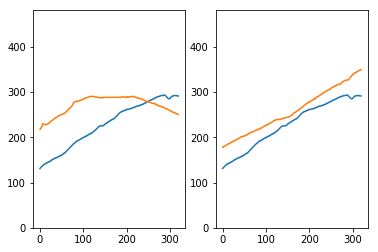

505.0.txt
['373.0.txt', '505.0.txt', '163.0.txt', '146.0.txt', '943.0.txt']
*************failed********************


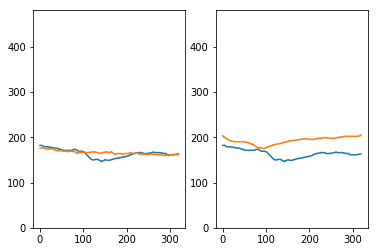

518.0.txt
['926.0.txt', '220.0.txt', '883.0.txt', '282.0.txt', '848.0.txt']
*************failed********************


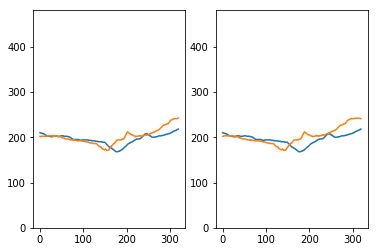

249.0.txt
['269.0.txt', '249.0.txt', '798.0.txt', '381.0.txt', '828.0.txt']
*************failed********************


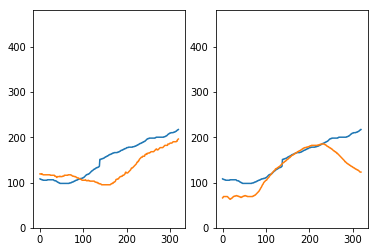

841.0.txt
['233.0.txt', '491.0.txt', '332.0.txt', '354.0.txt', '152.0.txt']
*************failed********************


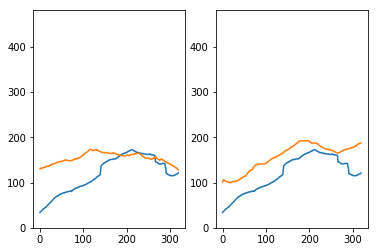

19.0.txt
['332.0.txt', '24.0.txt', '491.0.txt', '426.0.txt', '758.0.txt']


In [4]:
path = "../data/test"
for result in results:
    if result["status"] == "failed":
        line_t_i = get_line(os.path.join(path, result["filenames"][result["target"]]), 0)
        line_t_d = get_line(os.path.join(path, result["filenames"][result["target"]]), 1)
        line_w_d = get_line(os.path.join(path, result["filenames"][result["dist"][0]]), 1)
        
        print('*************failed********************')
        plt.figure()
        plt.subplot(121)
        plt.plot(line_t_i)
        plt.plot(line_t_d)
        plt.ylim(0,480)
        plt.subplot(122)
        plt.plot(line_t_i)
        plt.plot(line_w_d)
        plt.ylim(0,480)
        plt.show()
        
        print(result["filenames"][result["target"]])
        print([result["filenames"][i] for i in result["dist"][:5]])
        
        

# 显示loss曲线、acc曲线

In [5]:
def read_txt_loss(filename):
    with open(filename, 'r') as file_to_read:
        list0 = [] #文件中的第一列数据
        while True:
            lines = file_to_read.readline()  # 整行读取数据
            if not lines:
                break
            item = float(lines.strip().split(' ')[1].split(':')[1])
            list0.append(item)
    return list0

(0, 1)

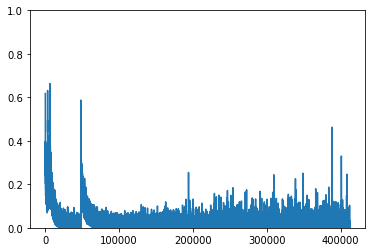

In [7]:
filename = os.path.join("../checkpoint/new/train.log")
list0 = read_txt_loss(filename)
plt.plot(list0)
plt.ylim(0,1)

In [8]:
def read_txt_acc(filename):
    with open(filename, 'r') as file_to_read:
        list0 = [] 
        while True:
            lines = file_to_read.readline()  # 整行读取数据
            if not lines:
                break
            item = float(lines.strip().split(' ')[1])
            list0.append(item)
    return list0

(0, 1)

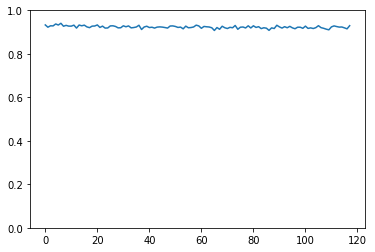

In [9]:
filename = os.path.join("../checkpoint/new/valid.log")
list_acc = read_txt_acc(filename)
plt.plot(list_acc)
plt.ylim(0,1)